<img src="./img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Project - Measuring Drop Spreading Law

Draga Pihler-Puzovic<br>
University of Manchester  
January 2021

We first initialise our Python interpreter

In [1]:
# Initialisation
import string
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

![](./img/bee.png)
## Experimental Data

This is data that you are working with. It consists of a sequence of circle radii ($R$, measured in micrometers), obtained from image processing in three different experimental runs. The corresponding time ($t$, measured in seconds) was obtained from the image timestamps measured from the beginning of the experiment.     

In [2]:
# Radius data 
# experiment 1
radius_data1 = np.array([59.513027, 66.368389, 69.506166, 71.700852, 74.735925, 76.007795, 76.695256, 78.039551, 79.598386, 80.075493, 80.079624, 81.495363, 82.598934, 83.172805, 84.919440, 85.155809, 85.718415, 85.920147, 86.000243, 87.120934, 87.507943, 87.786892, 87.060409, 88.086562, 88.113767, 88.436448, 89.082172, 89.139957, 89.210538, 89.356928, 90.312937, 90.406557, 90.754907, 90.88941, 91.096467])
# experiment 2
radius_data2 = np.array([59.810888, 65.360919, 69.088934, 72.594631, 74.694093, 76.440186, 78.133942, 78.618537, 79.753566, 80.745559, 81.422723, 81.634563, 82.861597, 84.335873, 85.362055, 85.537714, 86.159399, 86.873675, 86.918131, 87.003533, 87.126402, 87.155440, 87.224911, 87.394479, 87.433936, 87.626938, 87.701465, 87.834029, 87.963874, 88.153147, 88.209880, 88.542036, 88.86527, 89.082038, 89.214132])
# experiment 3
radius_data3 = np.array([58.200029, 64.826353, 69.332991, 73.504694, 74.295033, 77.506575, 78.413291, 79.952682, 81.339708, 81.938359, 82.528196, 82.807452, 83.378999, 84.521468, 84.507216, 85.064265, 85.247146, 85.900079, 86.475709, 86.776052, 87.158810, 87.343755, 87.448085, 87.822712, 88.140434, 88.311032, 88.619312, 88.970210, 89.373613, 89.754486, 89.900430, 90.116608, 90.288358, 90.711677, 90.989783])
# time
time = np.array([0.500000, 1.000000, 1.500000, 2.000000, 2.500000, 3.000000, 3.500000, 4.000000, 4.500000, 5.000000, 5.500000, 6.000000, 6.500000, 7.000000, 7.500000, 8.000000, 8.500000, 9.000000, 9.500000, 10.000000, 10.500000, 11.000000, 11.500000, 12.000000, 12.500000, 13.000000, 13.500000, 14.000000, 14.500000, 15.000000, 15.500000, 16.000000, 16.500000, 17.000000, 17.500000])

Let's plot this data to see what it looks like:

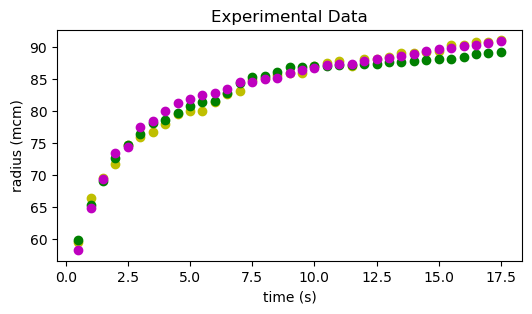

In [3]:
# tweeking the figure size
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
# plotting data from experimental runs 1-3:
plt.plot(time, radius_data1, "yo")
plt.plot(time, radius_data2, "go")
plt.plot(time, radius_data3, "mo")
# setting axis labels & figures 
plt.xlabel("time (s)")
plt.ylabel("radius (mcm)")
plt.title("Experimental Data")
# displaying the plot
plt.show()

Don't forget to find the errors on $R$ estimated from the three experimental runs.

In [5]:
def radius_fit(times, a):
    return a*times**0.1

a_fit,cov= curve_fit(radius_fit,time,radius_mean,sigma=radius_std)
predicted_radius = radius_fit(time, a_fit[0])


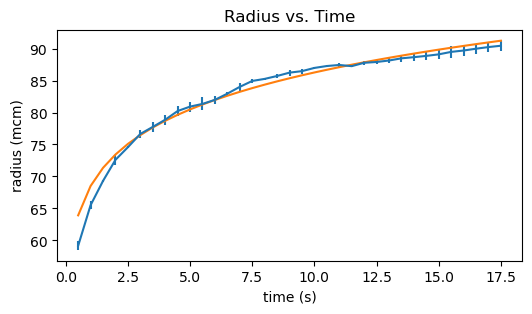

In [16]:
radius_data = np.array([radius_data1,radius_data2,radius_data3])
radius_mean = np.mean(radius_data, axis = 0)
radius_std = np.std(radius_data, axis = 0)
plt.figure()
plt.errorbar(time, radius_mean, yerr= radius_std)
plt.plot(time,predicted_radius)
plt.xlabel("time (s)")
plt.ylabel("radius (mcm)")
plt.title("Radius vs. Time")
plt.show()

![](./img/bee.png)
## Extracting Quantities Using Experimental Data

In order to find the spreading law: a relationship between the speed of the contact line ($U$) and the contact angle ($\theta$), we need to first find the quantities themselves, ie express $U$ and $\theta$ using $R=R(t)$. 

To speed of the contact line can be calculated using $U = \frac{dR}{dt} \approx \frac{R(t+\delta t)-R(t)}{\delta t}$, where $R(t+\delta t)$ and $R(t)$ are two sequential values of the footprint radii measured with time intreval $\delta t$ apart.  

To find the contact angle, we make the spherical cap approximation that allows us to calculate the height of the drop ($H$) from its volume ($V=7.6$ pL) and its footprint radius ($R$) which are known from experiments via relationship $V=\frac{\pi}{6}H(3R^2+H^2)$. The contact angle can then be found from $R$ and $H$ using $\theta = \frac{\pi}{2} - \mathrm{atan}\frac{R^2-H^2}{2HR}$. 

There are three sets of experimental data, so for each one of them a relationship $U=U(\theta)$ should be found.

The cubic formula for the height is given by:
$ H = (\frac{3V}{\pi} + ((\frac{3V}{\pi})^2 + (R^2)^3))^{1/2})^{1/3} + (\frac{3V}{\pi} - ((\frac{3V}{\pi})^2 + (R^2)^3))^{1/2})^{1/3}$

Therefore,
$ H = (k + (k^2 + (R^2)^3))^{1/2})^{1/3} + (k - (k^2 + (R^2)^3))^{1/2})^{1/3}$
where $ k = \frac{3V}{\pi} $

In [6]:
#Finding H in micometers 
volume = 7.6*10**3 
k = 3*volume/np.pi
#Experiment 1
radius_squared = radius_data1**2
square_root = ((k)**2+(radius_squared)**3)**0.5
first_cube_root = (k + square_root)**(1/3)
second_cube_root = -(square_root-k)**(1/3)
height_1 = first_cube_root + second_cube_root
#Experiment 2
radius_squared = radius_data2**2
square_root = ((k)**2+(radius_squared)**3)**0.5
first_cube_root = (k + square_root)**(1/3)
second_cube_root = -(square_root-k)**(1/3)
height_2 = first_cube_root + second_cube_root
#Experiment 3
radius_squared = radius_data3**2
square_root = ((k)**2+(radius_squared)**3)**0.5
first_cube_root = (k + square_root)**(1/3)
second_cube_root = -(square_root-k)**(1/3)
height_3 = first_cube_root + second_cube_root

height = np.array([height_1,height_2,height_3])
height_mean = np.mean(height, axis = 0)
height_std = np.std(height, axis = 0)

The contact angle can then be found from $R$ and $H$ using $\theta = \frac{\pi}{2} - \mathrm{atan}\frac{R^2-H^2}{2RH}$.

In [7]:
#Experiment 1
theta_1 = (np.pi/2)-np.arctan((radius_data1**2+height_1**2)/(2*radius_data1*height_1))
#Experiment 2
theta_2 = (np.pi/2)-np.arctan((radius_data2**2+height_2**2)/(2*radius_data2*height_2))
#Experiment 3
theta_3 = (np.pi/2)-np.arctan((radius_data3**2+height_3**2)/(2*radius_data3*height_3))

theta = np.array([theta_1,theta_2,theta_3])
theta_mean = np.mean(theta, axis = 0)
theta_std = np.std(theta, axis = 0)

Let's plot these results to see what they look like:

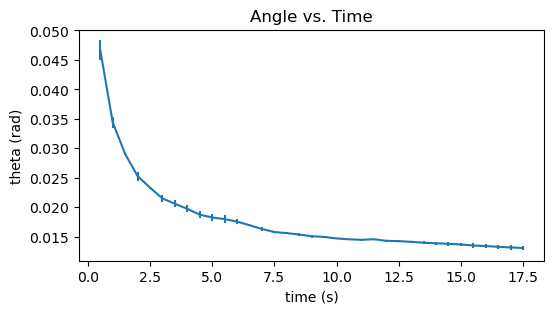

In [8]:
plt.figure()
plt.errorbar(time, theta_mean, yerr= theta_std)
plt.xlabel("time (s)")
plt.ylabel("theta (rad)")
plt.title("Angle vs. Time")
plt.show()

The data $U=U(\theta)$ obtained for each of the three experimental runs is used to estimate the relationship between the mean contact line speed and the mean contact angle, and the corresponding errors on those. The result of this is plotted below. 

In [9]:
speed_1 = np.array([])
speed_2 = np.array([])
speed_3 = np.array([])
speed_time =np.array([])
for i in range(len(radius_mean)-1):
    speed_1 = np.append(speed_1, (radius_data1[i+1]-radius_data1[i])/(time[i+1]-time[i]))
    speed_2 = np.append(speed_2, (radius_data2[i+1]-radius_data2[i])/(time[i+1]-time[i]))
    speed_3 = np.append(speed_3, (radius_data3[i+1]-radius_data3[i])/(time[i+1]-time[i]))
    speed_time = np.append(speed_time, time[i])


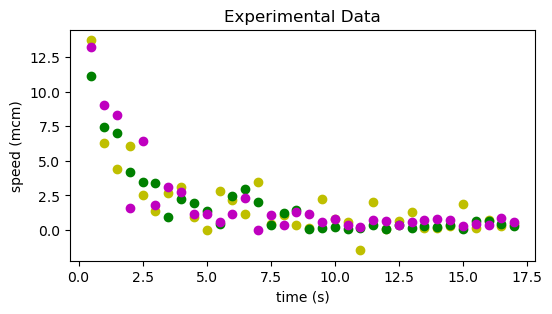

In [10]:
# tweeking the figure size
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
# plotting data from experimental runs 1-3:
plt.plot(time[:-1], speed_1, "yo")
plt.plot(time[:-1], speed_2, "go")
plt.plot(time[:-1], speed_3, "mo")
# setting axis labels & figures 
plt.xlabel("time (s)")
plt.ylabel("speed (mcm)")
plt.title("Experimental Data")
# displaying the plot
plt.show()

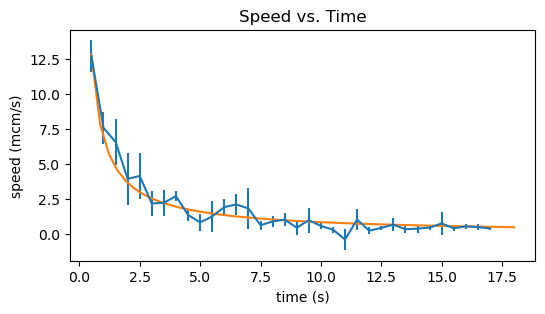

In [11]:
speeds = np.array([speed_1,speed_2,speed_3])
speed_mean = np.average(speeds, axis=0)
speed_std = np.std(speeds, axis = 0)

model_time = np.linspace(0.5,18)
model_angle = a_fit*0.1*model_time**(-0.9)

plt.errorbar(speed_time, speed_mean, yerr= speed_std)
plt.plot(model_time,model_angle)
plt.xlabel("time (s)")
plt.ylabel("speed (mcm/s)")
plt.title("Speed vs. Time")
plt.show()

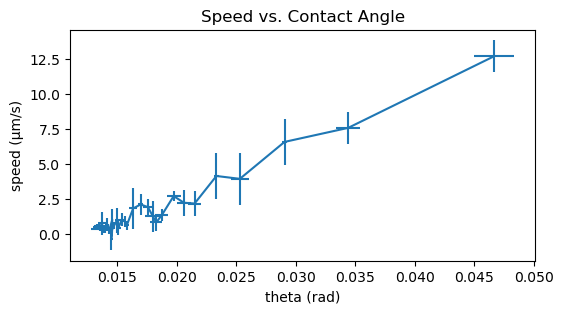

In [12]:
plt.figure()
plt.errorbar(theta_mean[:-1], speed_mean, xerr = theta_std[:-1], yerr= speed_std)
plt.xlabel("theta (rad)")
plt.ylabel("speed (μm/s)")
plt.title("Speed vs. Contact Angle")
plt.show()


![](./img/bee.png)
## Fitting Spreading Laws

We will now attemp to fit the Cox-Voinov law ($U = U_0( \theta^3 –  \theta_0^3)$) and the de Gennes law ($U = U_0( \theta^2 –  \theta_0^2)$) to the mean data $U=U(\theta)$ ploted above, where $U_0$ is termed the characteristic speed of the contact line, and $\theta_0$ is the equilibrium contact angle (when $\theta=\theta_0$, $U=0$). To avoid using nonlinear least square method, we will fit a straight line to the data $U=U(\theta^2)$ and $U=U(\theta^3)$. This will produce the values for the characteristic speed and the error on it $U_0^{fit} \pm \delta U_0^{fit}$, but it will not give the values of the equilibrium contact angle $\theta_0^{fit}$. Instead, $[U_0\theta^n]^{fit}$ with $n=2$ or $n=3$ will be found, from which $\theta_0$ can be comupted. The corresponding error $\delta\theta^{fit}$ should be found by propagating the errors from  $[U_0\theta^n]^{fit}$ and $U_0^{fit}$.

The initial speed is 6,585.76μm/s ± 264.20μm/s
The initial angle is 0.00964rad ± 0.00112rad


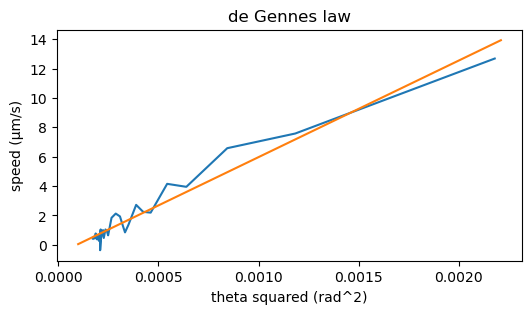

In [13]:
#Calculating the equation for the line of best fit
theta_squared = (theta_mean)**2
p, cov = np.polyfit(theta_squared[:-1], speed_mean, 1, cov=True)

#Creating the line of best fit
theta_pred = np.linspace(0.01,0.047) #Array of angles
speed_pred = p[0]*theta_pred**2 + p[1] #Array of predicted speeds

#Calculating the inital speed
print(f'The initial speed is {p[0]:,.2f}μm/s ± {np.sqrt(cov[0][0]):.2f}μm/s')

#Calculating theta_0 and its uncertainty
theta_0_squared = np.sqrt(-p[1]/p[0])
_frac = -p[0]/p[1]
_theta_0_var = 0.25*(_frac*(cov[1][1])/(p[0]**2) + (_frac**(-3))*(cov[0][0])/(p[1]**2))
theta_0_std_squared = np.sqrt(_theta_0_var)
print(f'The initial angle is {theta_0_squared:.3g}rad ± {theta_0_std_squared:.3g}rad')

#Plotting the graph
plt.figure()
plt.plot(theta_squared[:-1], speed_mean)
plt.plot(theta_pred**2,speed_pred)
plt.xlabel("theta squared (rad^2)")
plt.ylabel("speed (μm/s)")
plt.title("de Gennes law")
plt.show()

#Calculating the speed predicted at the times the angles were measured and corresponding uncertainties
speed_pred_squared = p[0]*theta_squared + p[1]


The initial speed is 134,922.41μm/s ± 8709.03μm/s
The initial angle is -0.0164rad ± 0.00165rad


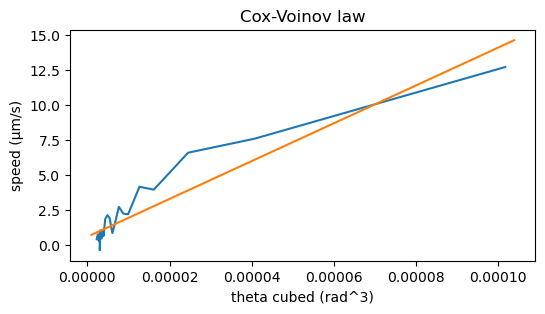

In [14]:
#Calculating the equation for the line of best fit
theta_cubed = (theta_mean)**3
theta_cubed_uncertainty = np.sqrt(3*(theta_mean**2)*theta_std**2)
q, cov = np.polyfit(theta_cubed[:-1], speed_mean, 1, cov=True)


#Creating the line of best fit
theta_pred = np.linspace(0.01,0.047)
speed_pred = q[0]*theta_pred**3 + q[1]

#Calculating the inital speed
print(f'The initial speed is {q[0]:,.2f}μm/s ± {np.sqrt(cov[0][0]):.2f}μm/s')

#Calculating theta_0 and its uncertainty
theta_0_cubed = (q[1]/q[0])**(1/3)
_frac = q[0]/q[1]
_theta_0_var = (1/9)*(np.power(_frac,4/3)*(cov[1][1])/(q[0]**2) + (np.power(_frac,-8/3)*(cov[0][0])/(q[1]**2)))
theta_0_std_cubed = np.sqrt(_theta_0_var)

print(f'The initial angle is {-theta_0_cubed:.3g}rad ± {theta_0_std_cubed:.3g}rad')

#Plotting the graph
plt.figure()
plt.plot(theta_cubed[:-1], speed_mean)
plt.plot(theta_pred**3,speed_pred)
plt.xlabel("theta cubed (rad^3)")
plt.ylabel("speed (μm/s)")
plt.title("Cox-Voinov law")
plt.show()



#Calculating the speed predicted at the times the angles were measured and corresponding uncertainties
speed_pred_cubed = q[0]*theta_cubed + q[1]


![](./img/bee.png)
## Chi-squared Test

To establish which of the two laws better fits the data, we conduct the chi-squared test. The reduced chi squared is calculated and then compared with the acceptable range of values of chi square, (i.e. between $1- \sqrt{\frac{8}{N_{dof}}}$ and $1+ \sqrt{\frac{8}{N_{dof}}}$)

In [15]:
def get_reduced_chi_squared(y_pred,y_data, y_error, free_parameters):
    acceptable = False
    degrees_of_freedom = len(y_data)-free_parameters
    _temp = (y_pred-y_data)/y_error
    chi_squared = sum(_temp**2)
    _temp_2 = np.sqrt(8/degrees_of_freedom)
    if 1-_temp_2 <= chi_squared/degrees_of_freedom <= 1+_temp_2:
        acceptable = True
    return acceptable, chi_squared/degrees_of_freedom
    
squared_acceptable, red_chi_squared_squared = get_reduced_chi_squared(speed_pred_squared[:-1], speed_mean, speed_std, 2)
cubed_acceptable, red_chi_squared_cubed = get_reduced_chi_squared(speed_pred_cubed[:-1], speed_mean, speed_std, 2)



print(f'The reduced chi squared for the de Gennes law is {red_chi_squared_squared:.2f}')
if squared_acceptable == True:
    print('This is an acceptable model for the data')
else:
    print('This is not an acceptable model for the data')

print(f'The reduced chi squared for the Cox-Voinov law is {red_chi_squared_cubed:.2f}')
if cubed_acceptable == True:
    print('This is an acceptable model for the data')
else:
    print('This is not an acceptable model for the data')


The reduced chi squared for the de Gennes law is 1.06
This is an acceptable model for the data
The reduced chi squared for the Cox-Voinov law is 3.48
This is not an acceptable model for the data


![](./img/bee.png)
## Drop Spreading Law Is

The results of the chi-squared analysis suggest that the de Gennes law is a better fit for the behaviour of the spreading drop because its reduced chi squared value falls within the accepatble range